## Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Checking for Duplicated and Null values

In [3]:
df.duplicated().sum()

6

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

Insight: Each feature contains significantly large number of null values. 

### Removing all null values.

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Data type correction

In [8]:
df['Year'] = df['Year'].str.replace('(','').str.replace(')','').astype(int)
df['Duration'] = df['Duration'].str.replace(' min','').astype(int)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Genre'] = df['Genre'].str.replace(',', '').str.split().to_list()

for i in range(len(df)):
    cat = df['Genre'].iloc[i]
    j = len(cat)
    while j < 3:
        cat.append('Nan')
        j +=1
    df['Genre'].iloc[i] = cat

df['Genre']

1                  [Drama, Nan, Nan]
3             [Comedy, Romance, Nan]
5           [Comedy, Drama, Musical]
6              [Drama, Romance, War]
8        [Horror, Mystery, Thriller]
                    ...             
15493              [Drama, Nan, Nan]
15494    [Biography, Drama, History]
15503         [Action, Crime, Drama]
15505           [Action, Drama, Nan]
15508           [Action, Drama, Nan]
Name: Genre, Length: 5659, dtype: object

In [9]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,"[Drama, Nan, Nan]",7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"[Comedy, Romance, Nan]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"[Comedy, Drama, Musical]",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"[Drama, Romance, War]",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"[Horror, Mystery, Thriller]",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Seperating Genre into 3 different columns

In [10]:
cat0 = []
cat1 = []
cat2 = []
for i in range(len(df)):
    cat = df['Genre'].iloc[i]
    cat0.append(cat[0])
    cat1.append(cat[1])
    cat2.append(cat[2])
df['Genre_1'] = cat0
df['Genre_2'] = cat1
df['Genre_3'] = cat2

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2,Genre_3
1,#Gadhvi (He thought he was Gandhi),2019,109,"[Drama, Nan, Nan]",7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Nan,Nan
3,#Yaaram,2019,110,"[Comedy, Romance, Nan]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,Nan
5,...Aur Pyaar Ho Gaya,1997,147,"[Comedy, Drama, Musical]",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"[Drama, Romance, War]",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"[Horror, Mystery, Thriller]",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller


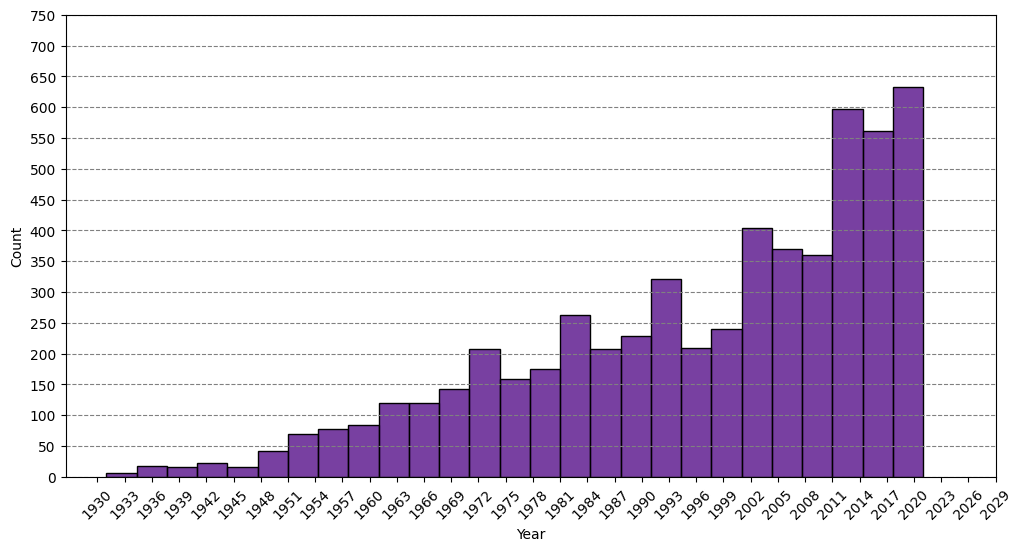

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(df, x='Year', color='indigo')
plt.xticks(np.arange(1930, 2030, step=3), rotation=45)
plt.yticks(np.arange(0,800,step=50))
plt.grid(axis='y', linestyle='--', color='grey')

Insight: Movie reliese was significantly low till 1960. Since the year 2000 to now, yearly movie reliese is getting  increased.

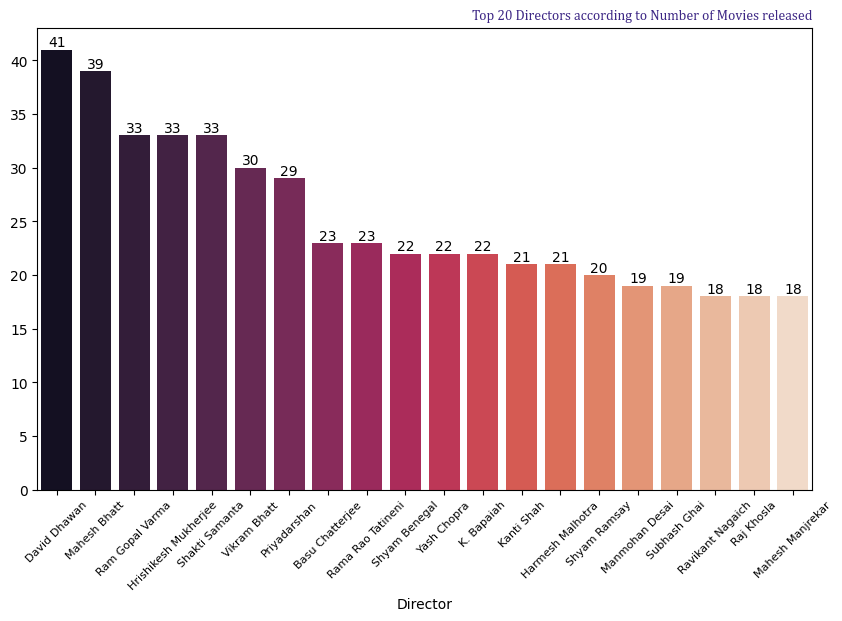

In [12]:
top_directors = df['Director'].value_counts().head(20)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette='rocket')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.xticks(rotation=45, fontsize=8)
plt.title("Top 20 Directors according to Number of Movies released", fontsize=15, font='cambria', loc='right', color='#3D2785')
plt.show()

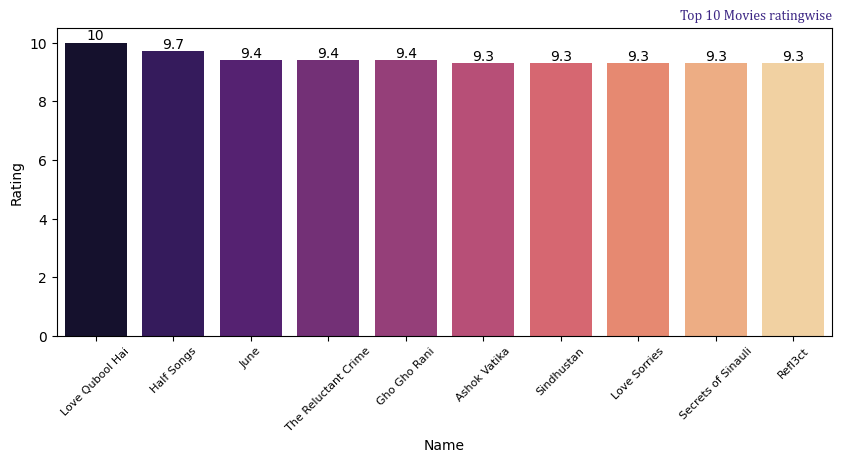

In [13]:
top_rated_movies = df[['Name', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10, 4))
ax = sns.barplot(top_rated_movies, x='Name', y='Rating', palette='magma')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xticks(rotation=45, fontsize=8)
plt.title("Top 10 Movies ratingwise", fontsize=15, font='cambria', loc='right', color='#3D2785')
plt.show()

Text(1.0, 1.0, 'Top 10 Actors with most acted movies')

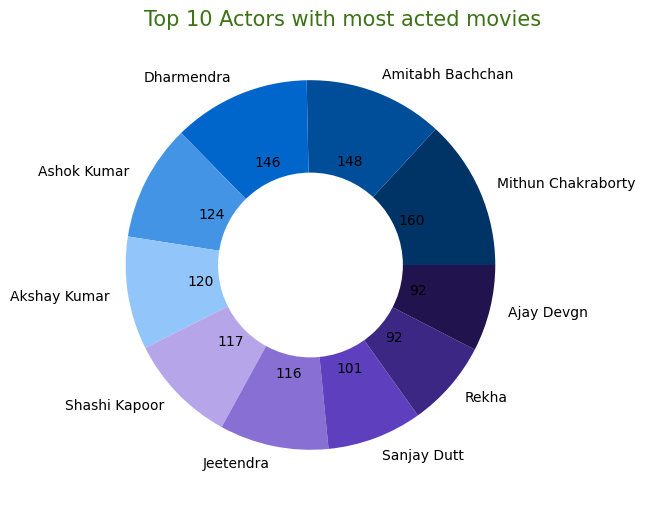

In [14]:
all_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top10 = all_actors.value_counts().head(10)

palette = ['#003366', '#004D99', '#0066CC', '#4394E5', '#92C5F9', '#B6A6E9', '#876FD4', '#5E40BE', '#3D2785', '#21134D']

plt.figure(figsize=(8, 6))
plt.pie(top10.values, autopct= lambda x: '{:.0f}'.format(x*top10.values.sum()/100), labels=top10.index, colors=palette)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Top 10 Actors with most acted movies", color='#3D7317', loc='right', fontsize=15)

Text(1.0, 1.0, 'Top 10 Genres with most movies made')

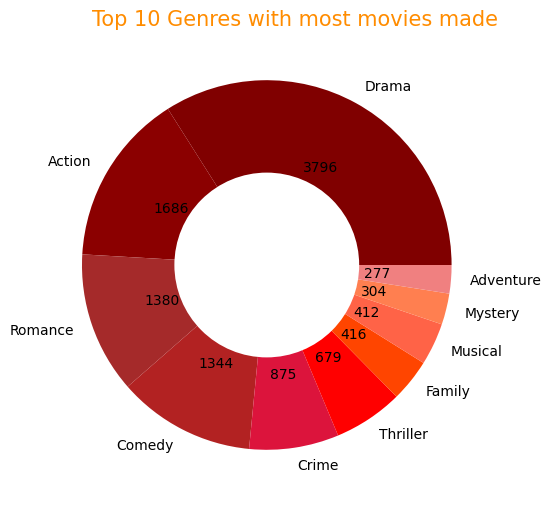

In [15]:
movie_genre = pd.concat([df['Genre_1'], df['Genre_2'], df['Genre_3']])
top10_genres = movie_genre.value_counts().drop(index='Nan').head(10)

palette = ['#800000', '#8B0000', '#A52A2A', '#B22222', '#DC143C', '#FF0000', '#FF4500', '#FF6347', '#FF7F50', '#F08080']

plt.figure(figsize=(8, 6))
plt.pie(top10_genres.values, autopct= lambda x: '{:.0f}'.format(x*top10_genres.values.sum()/100), labels=top10_genres.index, colors=palette)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Top 10 Genres with most movies made", color='#FF8C00', loc='right', fontsize=15)

## Removing Name and Genre column

In [16]:
df.drop(columns=['Name', 'Genre'], axis=1, inplace=True)

In [17]:
df.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_1,Genre_2,Genre_3
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,Nan,Nan
3,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,Nan
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller


## Data Encoding

In [18]:
df['Director'] = df.groupby('Director')['Rating'].transform('mean')
df['Genre_1'] = df.groupby('Genre_1')['Rating'].transform('mean')
df['Genre_2'] = df.groupby('Genre_2')['Rating'].transform('mean')
df['Genre_3'] = df.groupby('Genre_3')['Rating'].transform('mean')
df['Actor 1'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor 2'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor 3'] = df.groupby('Actor 3')['Rating'].transform('mean')

## Seperating Target variable and Splitting train and test data

In [19]:
x = df.drop(columns=['Rating'], axis=1)
y = df['Rating']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3961, 10), (1698, 10), (3961,), (1698,))

## Model Building and Training

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

reg = RandomForestRegressor()
params = {
    'max_depth': [1, 2, 3, 5],
    'n_estimators': [50, 100, 200],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}

model = GridSearchCV(reg, param_grid=params, verbose=3, cv=5, scoring='r2')
model.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.437 total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.442 total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.437 total time=   0.2s
[CV 4/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.441 total time=   0.2s
[CV 5/5] END criterion=squared_error, max_depth=1, n_estimators=50;, score=0.459 total time=   0.2s
[CV 1/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=0.429 total time=   0.4s
[CV 2/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=0.441 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=0.443 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=1, n_estimators=100;, score=0.443 total time=   0.4s
[CV 5/5] END criterion=squared_err

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=3)

In [22]:
model.best_score_, model.best_params_

(0.7743356171341933,
 {'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 200})

## Prediction and Accuracy

In [26]:
y_pred = model.predict(x_test)
print(f"Prediction accuracy: {r2_score(y_test, y_pred)}")

Prediction accuracy: 0.7862714547006522
